<a href="https://colab.research.google.com/github/tengkumuazabs/cxrdiagnosis-python/blob/develop/tesis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# edit branch baru

In [ ]:
!wget https://github.com/agchung/Actualmed-COVID-chestxray-dataset/archive/refs/heads/master.zip
!unzip /content/master.zip

--2023-01-26 05:24:41--  https://github.com/agchung/Actualmed-COVID-chestxray-dataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/agchung/Actualmed-COVID-chestxray-dataset/zip/refs/heads/master [following]
--2023-01-26 05:24:42--  https://codeload.github.com/agchung/Actualmed-COVID-chestxray-dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [           <=>      ]   1.06G  10.4MB/s    in 90s     

2023-01-26 05:26:13 (12.0 MB/s) - ‘master.zip’ saved [1138214898]

Archive:  /content/master.zip
27240dd8dec9454bc97f9f3c0c432ef434d

In [ ]:
!python -m pip install split-folder
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import pandas as pd
import os
import shutil
# from keras.models import Model, Sequential
# from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras.layers import BatchNormalization
# import os
import seaborn as sns
# from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
# from PIL import Image
# import shutil
import split_folder as sp
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
# from keras.utils import to_categorical
# import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, f1_score, recall_score, classification_report
# from keras.models import Sequential
# from keras.layers import Dense, Flatten, BatchNormalization, Dropout

In [ ]:
metadata = pd.read_csv('Actualmed-COVID-chestxray-dataset-master/metadata.csv')

if os.path.exists('Actualmed-COVID-chestxray-dataset-master/categories/COVID-19') == False: 
    os.makedirs('Actualmed-COVID-chestxray-dataset-master/categories/COVID-19')
if os.path.exists('Actualmed-COVID-chestxray-dataset-master/categories/No Finding') == False: 
    os.makedirs('Actualmed-COVID-chestxray-dataset-master/categories/No Finding')

from_folder = 'Actualmed-COVID-chestxray-dataset-master/images'
covid_folder = 'Actualmed-COVID-chestxray-dataset-master/categories/COVID-19'
no_finding_folder = 'Actualmed-COVID-chestxray-dataset-master/categories/No Finding'

for index in metadata.index.values:
    img_name = metadata.iloc[index]['imagename']
    keyword = metadata.iloc[index]['finding']
    img = cv2.imread(from_folder + '/' + img_name)
    # print(img.shape)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # print(img.shape)
    if keyword == 'COVID-19':
        cv2.imwrite(os.path.join(covid_folder, img_name), img)
    elif keyword == 'No finding':
        cv2.imwrite(os.path.join(no_finding_folder, img_name), img)

if os.path.exists('Actualmed-COVID-chestxray-dataset-master/dataset') == False: 
  os.makedirs('Actualmed-COVID-chestxray-dataset-master/dataset')

categories_folder = 'Actualmed-COVID-chestxray-dataset-master/categories'
dataset_folder = 'Actualmed-COVID-chestxray-dataset-master/dataset'

sp.ratio(categories_folder, dataset_folder, 
                   seed=42, ratio=(.7, .3), 
                   group_prefix=None)


Copying (40) of .. train/COVID-19



  0%|          | 0/40 [00:00<?, ?it/s]


Copying (18) of .. val/COVID-19



  0%|          | 0/18 [00:00<?, ?it/s]


Copying (88) of .. train/No Finding



  0%|          | 0/88 [00:00<?, ?it/s]


Copying (39) of .. val/No Finding



  0%|          | 0/39 [00:00<?, ?it/s]

In [ ]:
def feature_extractor(path):
    #Resize images
    SIZE = 299  

    #Capture training data and labels into respective lists
    train_images = []
    train_labels = [] 

    for directory_path in glob.glob(path + "/train/*"):
    # for directory_path in list(reversed(glob.glob(path + "/train/*"))):
        label = directory_path.split("/")[-1]
        for img_path in glob.glob(os.path.join(directory_path, "*.png")):
            img = cv2.imread(img_path)     
            # print(img.shape)
            img = cv2.resize(img, (SIZE, SIZE))
            # print(img.shape)
            train_images.append(img)
            train_labels.append(label)

    #Convert lists to arrays        
    train_images = np.array(train_images)
    train_labels = np.array(train_labels)
    # print ("train_labels = ", train_labels)

    # Capture test/validation data and labels into respective lists
    test_images = []
    test_labels = [] 

    for directory_path in glob.glob(path + "/val/*"):
    # for directory_path in list(reversed(glob.glob(path + "/val/*"))):
        label = directory_path.split("/")[-1]
        for img_path in glob.glob(os.path.join(directory_path, "*.png")):
            img = cv2.imread(img_path)       
            img = cv2.resize(img, (SIZE, SIZE))
            test_images.append(img)
            test_labels.append(label)

    #Convert lists to arrays                
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)
    # print ("test_labels = ", test_labels)

    #Encode labels from text to integers.
    # le = preprocessing.LabelEncoder()

    # le.fit(train_labels)
    # train_labels_encoded = le.transform(train_labels)
    # # train_labels_encoded = le.fit_transform(-train_labels_encoded)
    # # print ("train_labels_encoded = ", train_labels_encoded)    

    # le.fit(test_labels)
    # test_labels_encoded = le.transform(test_labels)
    # # test_labels_encoded = le.fit_transform(-test_labels_encoded)
    # # print ("test_labels_encoded = ", test_labels_encoded)

    #Split data into test and train datasets (already split but assigning to meaningful convention)
    x_train, y_train, x_test, y_test = train_images, train_labels, test_images, test_labels

    # print(x_train)  

    # Normalize pixel values to between 0 and 1
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # print(x_train)

    #Load model without classifier/fully connected layers
    inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))
    # inception_model.summary()

    #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
    # for layer in inception_model.layers:
    # 	layer.trainable = False
    # inception_model.summary()  #Trainable parameters will be 0

    #Now, let us use features from convolutional network for SVM
    feature_extractor = inception_model.predict(x_train)
    features = feature_extractor.reshape(feature_extractor.shape[0], -1)

    return features, y_train, x_test, y_test, inception_model

In [ ]:
x_train_features, y_train, x_test, y_test, inception_model = feature_extractor(dataset_folder) #These are our input to SVM

4/4 [==============================] - 29s 7s/step


In [ ]:
def SVM(kernel, x_train_features, y_train, x_test, y_test):
  print ("Kernel = ", kernel)

  #Create a SVM Classifier
  clf = svm.SVC(kernel=kernel, probability=True)

  #Train the model using the training sets
  clf.fit(x_train_features, y_train) #For sklearn no one hot encoding

  # print(clf.classes_)

  #Send test data through same feature extractor process
  x_test_feature = inception_model.predict(x_test)
  x_test_features = x_test_feature.reshape(x_test_feature.shape[0], -1)

  #Now predict using the trained SVM model. 
  prediction_SVM = clf.predict(x_test_features)
  # print ("pred SVM = ", prediction_SVM)

  prediction_SVM_proba = clf.predict_proba(x_test_features)[:,1]
  # print ("type = ", type(prediction_SVM_proba))
  # print ("pred SVM_proba= ", prediction_SVM_proba)

  # prediction_SVM_proba = np.amax(prediction_SVM_proba,axis=1)
  # print ("pred SVM = ", prediction_SVM_proba)
  # print ("y test = ", y_test)

  #Print AUC and ROC Curve
  fpr1, tpr1, thresholds = roc_curve(y_test, prediction_SVM_proba, pos_label='COVID-19')
  fig = plt.figure()
  plt.ylabel("True Positive Rate")
  plt.xlabel("False Positive Rate")
  plt.title("ROC Curve")
  plt.plot(tpr1,fpr1)
  plt.show()

  auc_score = roc_auc_score(y_test, prediction_SVM_proba)
  print ("AUC = ", round(auc_score,2))

  #Inverse le transform to get original label back. 
  # prediction_SVM = le.inverse_transform(prediction_SVM)

  # print ("test_labels = ", test_labels)
  # print ("prediction_SVM = ", prediction_SVM)

  target_names = ['No Finding', 'COVID-19']
  print(classification_report(y_test, prediction_SVM))

  # acc = accuracy_score(test_labels, prediction_SVM)
  # print ("Accuracy = ", round(acc,2))

  # p = precision_score(test_labels, prediction_SVM,  pos_label='0')
  # print ("Precision = ", round(p,2))

  # r = recall_score(test_labels, prediction_SVM, pos_label='0')
  # print ("Recall = ", round(r,2))

  # f1 = f1_score(test_labels, prediction_SVM,  pos_label='0')
  # print ("F1 Score = ", round(f1,2))

  #Confusion Matrix - verify accuracy of each class
  cm = confusion_matrix(y_test, prediction_SVM, labels=target_names)
  # print(cm)
  # sns.heatmap(cm, annot=True)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
  disp.plot()
  plt.show()

  TN = cm[0][0]
  FN = cm[1][0]
  TP = cm[1][1]
  FP = cm[0][1]
  print ("TN = ", TN)
  print ("FN = ", FN)
  print ("TP = ", TP)
  print ("FP = ", FP)

  print('---------------------------------')

Kernel =  linear
2/2 [==============================] - 13s 5s/step


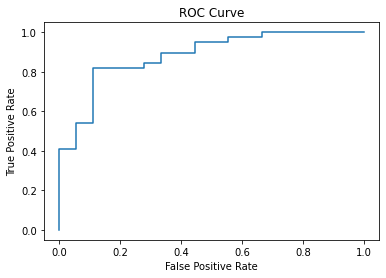

AUC =  0.88
              precision    recall  f1-score   support

    COVID-19       0.77      0.56      0.65        18
  No Finding       0.82      0.92      0.87        39

    accuracy                           0.81        57
   macro avg       0.79      0.74      0.76        57
weighted avg       0.80      0.81      0.80        57



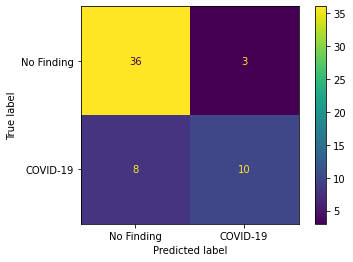

TN =  36
FN =  8
TP =  10
FP =  3
---------------------------------
Kernel =  poly
2/2 [==============================] - 13s 5s/step


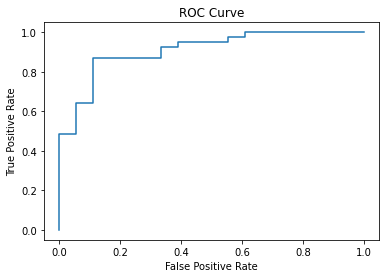

AUC =  0.91
              precision    recall  f1-score   support

    COVID-19       0.89      0.44      0.59        18
  No Finding       0.79      0.97      0.87        39

    accuracy                           0.81        57
   macro avg       0.84      0.71      0.73        57
weighted avg       0.82      0.81      0.78        57



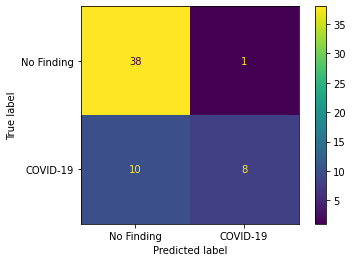

TN =  38
FN =  10
TP =  8
FP =  1
---------------------------------
Kernel =  rbf
2/2 [==============================] - 11s 5s/step


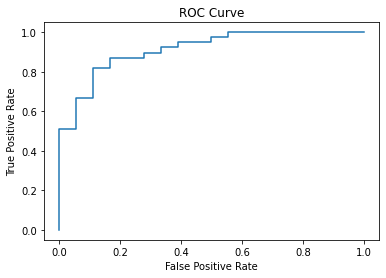

AUC =  0.91
              precision    recall  f1-score   support

    COVID-19       0.82      0.50      0.62        18
  No Finding       0.80      0.95      0.87        39

    accuracy                           0.81        57
   macro avg       0.81      0.72      0.75        57
weighted avg       0.81      0.81      0.79        57



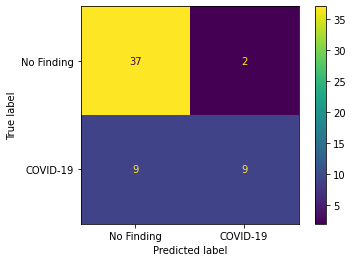

TN =  37
FN =  9
TP =  9
FP =  2
---------------------------------
Kernel =  sigmoid
2/2 [==============================] - 14s 6s/step


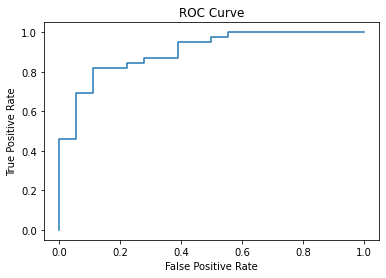

AUC =  0.9
              precision    recall  f1-score   support

    COVID-19       0.82      0.50      0.62        18
  No Finding       0.80      0.95      0.87        39

    accuracy                           0.81        57
   macro avg       0.81      0.72      0.75        57
weighted avg       0.81      0.81      0.79        57



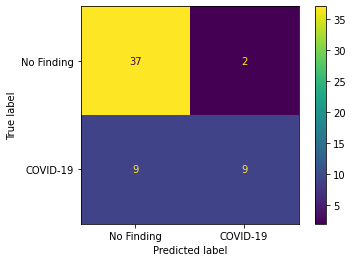

TN =  37
FN =  9
TP =  9
FP =  2
---------------------------------


In [ ]:
SVM('linear', x_train_features, y_train, x_test, y_test)
SVM('poly', x_train_features, y_train, x_test, y_test)
SVM('rbf', x_train_features, y_train, x_test, y_test)
SVM('sigmoid', x_train_features, y_train, x_test, y_test)

In [ ]:
# === CLAHE ===

In [ ]:
if os.path.exists('Actualmed-COVID-chestxray-dataset-master/categories_enhanced') == False: 
  os.makedirs('Actualmed-COVID-chestxray-dataset-master/categories_enhanced')
  os.makedirs('Actualmed-COVID-chestxray-dataset-master/categories_enhanced/COVID-19')
  os.makedirs('Actualmed-COVID-chestxray-dataset-master/categories_enhanced/No Finding')

covid_folder = 'Actualmed-COVID-chestxray-dataset-master/categories/COVID-19'
no_finding_folder = 'Actualmed-COVID-chestxray-dataset-master/categories/No Finding'

covid_folder_enhanced = 'Actualmed-COVID-chestxray-dataset-master/categories_enhanced/COVID-19'
no_finding_folder_enhanced = 'Actualmed-COVID-chestxray-dataset-master/categories_enhanced/No Finding'

clahe = cv2.createCLAHE(clipLimit = 4.0)
 
for img_name in os.listdir(covid_folder):
    img = cv2.imread(covid_folder + '/' + img_name, cv2.IMREAD_GRAYSCALE)
    img = clahe.apply(img)
    cv2.imwrite(os.path.join(covid_folder_enhanced , img_name), img)

for img_name in os.listdir(no_finding_folder):
    img = cv2.imread(no_finding_folder + '/' + img_name, cv2.IMREAD_GRAYSCALE)
    img = clahe.apply(img)
    cv2.imwrite(os.path.join(no_finding_folder_enhanced , img_name), img)

if os.path.exists('Actualmed-COVID-chestxray-dataset-master/dataset_enhanced') == False: 
    os.makedirs('Actualmed-COVID-chestxray-dataset-master/dataset_enhanced')

categories_enhanced_folder = 'Actualmed-COVID-chestxray-dataset-master/categories_enhanced'
dataset_enhanced_folder = 'Actualmed-COVID-chestxray-dataset-master/dataset_enhanced'

sp.ratio(categories_enhanced_folder, dataset_enhanced_folder, 
                   seed=42, ratio=(.7, .3), 
                   group_prefix=None)


Copying (40) of .. train/COVID-19



  0%|          | 0/40 [00:00<?, ?it/s]


Copying (18) of .. val/COVID-19



  0%|          | 0/18 [00:00<?, ?it/s]


Copying (88) of .. train/No Finding



  0%|          | 0/88 [00:00<?, ?it/s]


Copying (39) of .. val/No Finding



  0%|          | 0/39 [00:00<?, ?it/s]

In [ ]:
x_train_features, y_train, x_test, y_test, inception_model = feature_extractor(dataset_enhanced_folder) #These are our input to SVM

4/4 [==============================] - 27s 6s/step


Kernel =  linear
2/2 [==============================] - 13s 5s/step


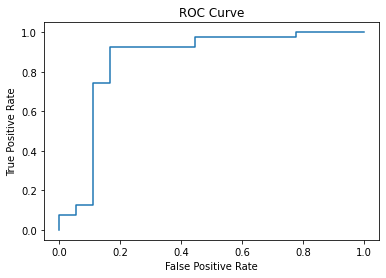

AUC =  0.86
              precision    recall  f1-score   support

    COVID-19       0.81      0.72      0.76        18
  No Finding       0.88      0.92      0.90        39

    accuracy                           0.86        57
   macro avg       0.85      0.82      0.83        57
weighted avg       0.86      0.86      0.86        57



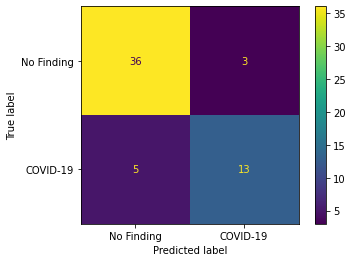

TN =  36
FN =  5
TP =  13
FP =  3
---------------------------------
Kernel =  poly
2/2 [==============================] - 11s 5s/step


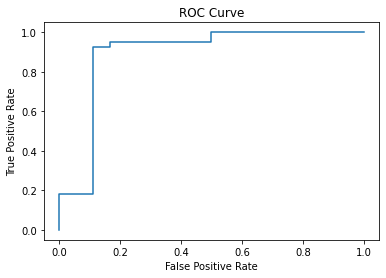

AUC =  0.89
              precision    recall  f1-score   support

    COVID-19       0.85      0.61      0.71        18
  No Finding       0.84      0.95      0.89        39

    accuracy                           0.84        57
   macro avg       0.84      0.78      0.80        57
weighted avg       0.84      0.84      0.83        57



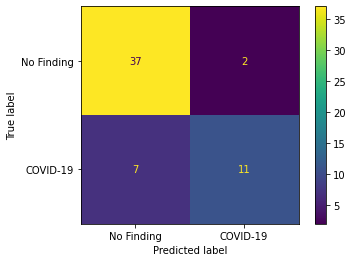

TN =  37
FN =  7
TP =  11
FP =  2
---------------------------------
Kernel =  rbf
2/2 [==============================] - 12s 5s/step


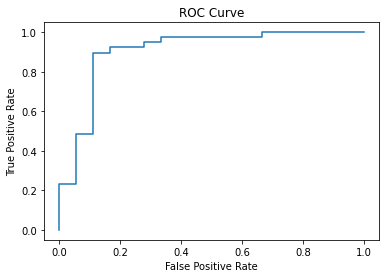

AUC =  0.9
              precision    recall  f1-score   support

    COVID-19       0.87      0.72      0.79        18
  No Finding       0.88      0.95      0.91        39

    accuracy                           0.88        57
   macro avg       0.87      0.84      0.85        57
weighted avg       0.88      0.88      0.87        57



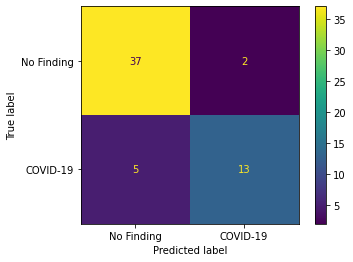

TN =  37
FN =  5
TP =  13
FP =  2
---------------------------------
Kernel =  sigmoid
2/2 [==============================] - 11s 5s/step


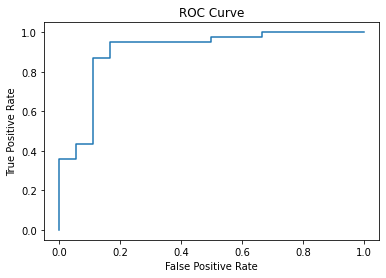

AUC =  0.9
              precision    recall  f1-score   support

    COVID-19       0.86      0.67      0.75        18
  No Finding       0.86      0.95      0.90        39

    accuracy                           0.86        57
   macro avg       0.86      0.81      0.83        57
weighted avg       0.86      0.86      0.85        57



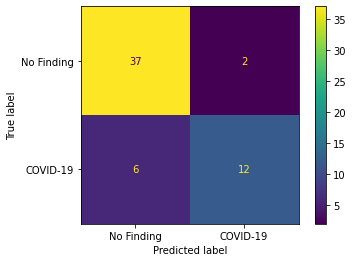

TN =  37
FN =  6
TP =  12
FP =  2
---------------------------------


In [ ]:
SVM('linear', x_train_features, y_train, x_test, y_test)
SVM('poly', x_train_features, y_train, x_test, y_test)
SVM('rbf', x_train_features, y_train, x_test, y_test)
SVM('sigmoid', x_train_features, y_train, x_test, y_test)

In [ ]:
# ------------------------------------------------------

In [ ]:
# ------------------------------------------------------

In [ ]:
# categories_folder = 'Actualmed-COVID-chestxray-dataset-master/categories'
# dataset_folder = 'Actualmed-COVID-chestxray-dataset-master/dataset'
# categories_enhanced_folder = 'Actualmed-COVID-chestxray-dataset-master/categories_enhanced'
# dataset_enhanced_folder = 'Actualmed-COVID-chestxray-dataset-master/dataset_enhanced'
# shutil.rmtree(categories_folder, ignore_errors=True)
# shutil.rmtree(dataset_folder, ignore_errors=True)
# shutil.rmtree(categories_enhanced_folder, ignore_errors=True)
# shutil.rmtree(dataset_enhanced_folder, ignore_errors=True)

In [ ]:
import keras
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Flatten 
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from keras.applications.efficientnet_v2 import EfficientNetV2M 

from keras.layers import BatchNormalization
from keras import Model

In [ ]:
#Resize images
SIZE = 299  

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob(dataset_folder + "/train/*"):
    label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path)     
        # print(img.shape)
        img = cv2.resize(img, (SIZE, SIZE))
        # print(img.shape)
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)
# print ("train_labels = ", train_labels)

# Capture test/validation data and labels into respective lists
test_images = []
test_labels = [] 
for directory_path in glob.glob(dataset_folder + "/val/*"):
    label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path)       
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)
# print ("test_labels = ", test_labels)

#Encode labels from text to integers.
le = preprocessing.LabelEncoder()

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
# train_labels_encoded = le.fit_transform(-train_labels_encoded)
# print ("train_labels_encoded = ", train_labels_encoded)    

le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
# test_labels_encoded = le.fit_transform(-test_labels_encoded)
# print ("test_labels_encoded = ", test_labels_encoded)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# print(x_train)  

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# print(x_train)

#Load model without classifier/fully connected layers
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))
# inception_model.summary()

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in inception_model.layers:
  layer.trainable = False
# inception_model.summary()  #Trainable parameters will be 0

In [ ]:
x = inception_model.output

# Flatten the output layer to 1 dimension
x = Flatten()(x)

# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# Add a final sigmoid layer for classification
x = Dense(1, activation='sigmoid')(x)

model = Model(inception_model.input, x)

# print(model.summary())

from keras.optimizers import adam_v2
opt = adam_v2.Adam(0.0003, beta_1=0.9, beta_2=0.999, amsgrad=True)
model.compile(optimizer=opt, loss = "binary_crossentropy", metrics = ["accuracy"]) 
h = model.fit(x_train, y_train, epochs=50, validation_data = (x_test, y_test), batch_size=32, verbose=1, shuffle=1)

In [ ]:
# for img_name in os.listdir(covid_folder)
#     img = cv2.imread(covid_folder + '/' + img_name, cv2.IMREAD_GRAYSCALE)
#     print(img.shape)
#     print(covid_folder + '/' + img_name)

In [ ]:
# X_for_RF = features #This is our X input to RF

# #Create a RF Classifier
# RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# #Train the model using the training sets
# RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# #Send test data through same feature extractor process
# x_test_feature = inception_model.predict(x_test)
# x_test_features = x_test_feature.reshape(x_test_feature.shape[0], -1)

# #Now predict using the trained RF model. 
# prediction_RF = RF_model.predict(x_test_features)
# #Inverse le transform to get original label back. 
# prediction_RF = le.inverse_transform(prediction_RF)

# #Print overall accuracy
# print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# #Confusion Matrix - verify accuracy of each class
# cm = confusion_matrix(test_labels, prediction_RF)
# #print(cm)
# sns.heatmap(cm, annot=True)

In [ ]:
# shutil.rmtree(categories_folder, ignore_errors=True)
# shutil.rmtree(dataset_folder, ignore_errors=True)
# shutil.rmtree(categories_enhanced_folder, ignore_errors=True)
# shutil.rmtree(dataset_enhanced_folder, ignore_errors=True)

In [ ]:
# if os.path.exists('Actualmed-COVID-chestxray-dataset-master/categories_enhanced') == False: 
#   os.makedirs('Actualmed-COVID-chestxray-dataset-master/categories_enhanced')
#   os.makedirs('Actualmed-COVID-chestxray-dataset-master/categories_enhanced/COVID-19')
#   os.makedirs('Actualmed-COVID-chestxray-dataset-master/categories_enhanced/No Finding')

# covid_folder = 'Actualmed-COVID-chestxray-dataset-master/categories/COVID-19'
# no_finding_folder = 'Actualmed-COVID-chestxray-dataset-master/categories/No Finding'

# covid_folder_enhanced = 'Actualmed-COVID-chestxray-dataset-master/categories_enhanced/COVID-19'
# no_finding_folder_enhanced = 'Actualmed-COVID-chestxray-dataset-master/categories_enhanced/No Finding'

# clahe = cv2.createCLAHE(clipLimit = 1.5)
 
# for img_name in os.listdir(covid_folder):
#     img = cv2.imread(covid_folder + '/' + img_name)
#     # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = clahe.apply(img)
#     cv2.imwrite(os.path.join(covid_folder_enhanced , img_name), img)

# for img_name in os.listdir(no_finding_folder):
#     img = cv2.imread(no_finding_folder + '/' + img_name)
#     # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = clahe.apply(img)
#     cv2.imwrite(os.path.join(no_finding_folder_enhanced , img_name), img)

# if os.path.exists('Actualmed-COVID-chestxray-dataset-master/dataset_enhanced') == False: 
#     os.makedirs('Actualmed-COVID-chestxray-dataset-master/dataset_enhanced')

# categories_enhanced_folder = 'Actualmed-COVID-chestxray-dataset-master/categories_enhanced'
# dataset_enhanced_folder = 'Actualmed-COVID-chestxray-dataset-master/dataset_enhanced'

# sp.ratio(categories_enhanced_folder, dataset_enhanced_folder, 
#                    seed=42, ratio=(.7, .3), 
#                    group_prefix=None)

In [ ]:
# inception_model.summary()

In [ ]:
# # BCET
# def bcet(img):
#     Lmin = np.min(img) # MINIMUM OF INPUT IMAGE
#     Lmax = np.max(img) # MAXIMUM OF INPUT IMAGE
#     Lmean = np.mean(img) #MEAN OF INPUT IMAGE
#     LMssum = np.mean(img * img) #MEAN SQUARE SUM OF INPUT IMAGE

#     Gmin = 0 #MINIMUM OF OUTPUT IMAGE
#     Gmax = 255 #MAXIMUM OF OUTPUT IMAGE
#     Gmean = 110 #MEAN OF OUTPUT IMAGE

#     bnum = Lmax * Lmax * (Gmean - Gmin) - LMssum * (Gmax - Gmin) + Lmin * Lmin * (Gmax - Gmean)
#     bden = 2 * (Lmax * (Gmean - Gmin) - Lmean * (Gmax - Gmin) + Lmin * (Gmax - Gmean))

#     b = bnum / bden

#     a = (Gmax - Gmin) / ((Lmax - Lmin) * (Lmax + Lmin - 2 * b))

#     c = Gmin - a * (Lmin - b) * (Lmin - b)

#     y = a * (img - b) * (img - b) + c #PARABOLIC FUNCTION
#     y = np.array(y, dtype=np.uint8)

#     return y

In [ ]:
# if os.path.exists('Actualmed-COVID-chestxray-dataset-master/categories_enhanced') == False: 
#   os.makedirs('Actualmed-COVID-chestxray-dataset-master/categories_enhanced')
#   os.makedirs('Actualmed-COVID-chestxray-dataset-master/categories_enhanced/COVID-19')
#   os.makedirs('Actualmed-COVID-chestxray-dataset-master/categories_enhanced/No Finding')

# covid_folder = 'Actualmed-COVID-chestxray-dataset-master/categories/COVID-19'
# no_finding_folder = 'Actualmed-COVID-chestxray-dataset-master/categories/No Finding'

# covid_folder_enhanced = 'Actualmed-COVID-chestxray-dataset-master/categories_enhanced/COVID-19'
# no_finding_folder_enhanced = 'Actualmed-COVID-chestxray-dataset-master/categories_enhanced/No Finding'
 
# for img_name in os.listdir(covid_folder):
#     img = cv2.imread(covid_folder + '/' + img_name, cv2.IMREAD_GRAYSCALE)
#     img = bcet(img)
#     cv2.imwrite(os.path.join(covid_folder_enhanced, img_name), img)

# for img_name in os.listdir(no_finding_folder):
#     img = cv2.imread(no_finding_folder + '/' + img_name, cv2.IMREAD_GRAYSCALE)
#     img = bcet(img)
#     cv2.imwrite(os.path.join(no_finding_folder_enhanced, img_name), img)

# if os.path.exists('Actualmed-COVID-chestxray-dataset-master/dataset_enhanced') == False: 
#     os.makedirs('Actualmed-COVID-chestxray-dataset-master/dataset_enhanced')

# categories_enhanced_folder = 'Actualmed-COVID-chestxray-dataset-master/categories_enhanced'
# dataset_enhanced_folder = 'Actualmed-COVID-chestxray-dataset-master/dataset_enhanced'

# sp.ratio(categories_enhanced_folder, dataset_enhanced_folder, 
#                    seed=42, ratio=(.7, .3), 
#                    group_prefix=None)

In [ ]:
SIZE = 299  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob(dataset_enhanced_folder + "/train/*"):
    label = directory_path.split("/")[-1]
    # print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path)       
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Capture test/validation data and labels into respective lists
test_images = []
test_labels = [] 
for directory_path in glob.glob(dataset_enhanced_folder + "/val/*"):
    label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path)       
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#Encode labels from text to integers.
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#Load model wothout classifier/fully connected layers
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))
# inception_model.summary()

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
# for layer in inception_model.layers:
# 	layer.trainable = False
# inception_model.summary()  #Trainable parameters will be 0

#Now, let us use features from convolutional network for SVM
feature_extractor = inception_model.predict(x_train)
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

x_train = features #This is our X input to SVM